In [84]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline

## Features to consider
1. Historical prices
2. Sentiment analysis

## Models to test
1. SKlearn SVM for regression
2. LSTM

## Getting data from BitStamp

In [85]:
ticker = "https://www.bitstamp.net/api/ticker/"
ticker_currency = "https://www.bitstamp.net/api/v2/ticker/"
transactions = "https://www.bitstamp.net/api/transactions/"
usd="btcusd"
eur="btceur"

In [86]:
r=requests.get(ticker_currency+usd)

In [87]:
response=r.json()
print(response)

{'high': '2402.50', 'last': '2288.81', 'timestamp': '1500513367', 'bid': '2283.01', 'vwap': '2309.80', 'volume': '16177.76016106', 'low': '2223.00', 'ask': '2288.81', 'open': '2265.51'}


In [88]:
print("Low: {0}, High {1}".format(response["low"], response["high"]))

Low: 2223.00, High 2402.50


In [89]:
r=requests.get(transactions)

In [123]:
trans=r.json()

In [124]:
trans

[{'amount': '0.40000000',
  'date': '1500513350',
  'price': '2288.81',
  'tid': 17507796,
  'type': 0},
 {'amount': '0.60000000',
  'date': '1500513350',
  'price': '2288.79',
  'tid': 17507795,
  'type': 0},
 {'amount': '1.00000000',
  'date': '1500513346',
  'price': '2288.81',
  'tid': 17507794,
  'type': 0},
 {'amount': '1.00000000',
  'date': '1500513335',
  'price': '2288.79',
  'tid': 17507793,
  'type': 0},
 {'amount': '1.00000000',
  'date': '1500513325',
  'price': '2286.99',
  'tid': 17507792,
  'type': 1},
 {'amount': '0.18223368',
  'date': '1500513324',
  'price': '2288.82',
  'tid': 17507791,
  'type': 0},
 {'amount': '0.89899032',
  'date': '1500513324',
  'price': '2288.22',
  'tid': 17507790,
  'type': 0},
 {'amount': '0.10100968',
  'date': '1500513323',
  'price': '2288.22',
  'tid': 17507789,
  'type': 0},
 {'amount': '0.05161232',
  'date': '1500513322',
  'price': '2287.00',
  'tid': 17507788,
  'type': 0},
 {'amount': '0.37015400',
  'date': '1500513322',
  'pr

In [125]:
trans[1]["price"]

'2288.79'

In [126]:
prices=[]
dates=[]

In [127]:
for i in range(len(trans)):
    prices.append(trans[i]["price"])
    dates.append(trans[i]["date"])

In [130]:
len(prices)

371

In [161]:
series=pd.DataFrame({'prices': prices,
                    'dates': dates})
series=series.astype(float)

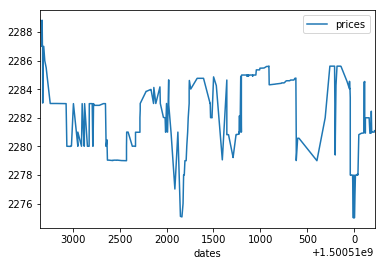

In [162]:
series.plot(x="dates",y="prices")